# Выделение сообществ

Материалы:
* Макрушин С.В. "Лекция 3: Выделение сообществ"
* Документация:
    * https://networkx.org/documentation/stable/reference/algorithms/community.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
    * https://networkx.org/documentation/networkx-1.10/reference/generators.html
    * https://seaborn.pydata.org/generated/seaborn.heatmap.html

## Плотность и модулярность

In [1]:
import networkx as nx

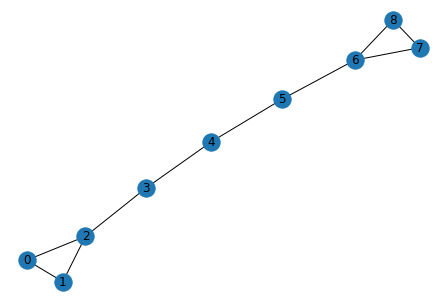

In [2]:
G = nx.barbell_graph(3,3)
nx.draw(G, with_labels=True)

In [3]:
communities1 = [{0, 1, 2}, {3, 4, 5}, {6, 7, 8}]
communities2 = [{0, 1, 2, 3},{4, 5, 6, 7, 8}]

In [4]:
(nx.density(G), 
 nx.density(G.subgraph(communities1[0])),
 nx.density(G.subgraph(communities1[1])),
 nx.density(G.subgraph(communities1[2])))

(0.2777777777777778, 1.0, 0.6666666666666666, 1.0)

In [5]:
(nx.density(G), 
 nx.density(G.subgraph(communities2[0])),
 nx.density(G.subgraph(communities2[1])))

(0.2777777777777778, 0.6666666666666666, 0.5)

In [6]:
import networkx.algorithms.community as nx_comm
nx_comm.modularity(G, communities1), nx_comm.modularity(G, communities2)

(0.46499999999999997, 0.395)

1.1 Взять сеть размером от 15 до 40 узлов и создать не менее 5 разбиений этой сети на 2 сообщества (часть разбиений должны частично или полностью соответствовать интуитивным представлениям о разбиении на сообщества, часть - нет). Визуализировать результаты.

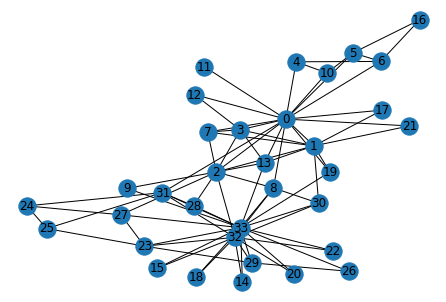

In [71]:
G = nx.karate_club_graph()
# commutities = []
nx.draw(G, with_labels=True)

In [72]:
colors=[0]*len(G.nodes)
import numpy as np
import math
for k in G.edges:
    if k[0]==0:
         colors[k[1]]='green'
    else:
        if k[1]==33:
            colors[k[0]]='red'
        else:
            s1=math.fabs(k[0]-0)
            s2=math.fabs(k[1]-33)
            if s1>s2:
                colors[k[0]]='red'
                colors[k[1]]='red'
            else:
                colors[k[1]]='green'
                colors[k[0]]='green'
colors[0]='green'
colors[33]='red'

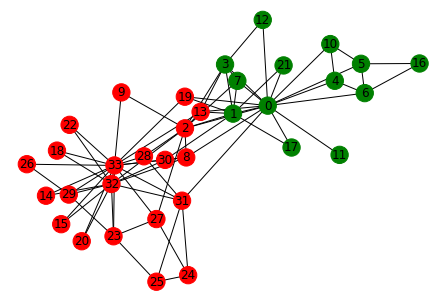

In [73]:
nx.draw(G,node_color=colors, with_labels=True)

In [74]:
communities1 = {0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 16, 17, 21}

In [75]:
c=[i for i in range(len(G.nodes))]

In [76]:
communities2 = set(c) - communities1

In [77]:
(nx.density(G), 
 nx.density(G.subgraph(communities1)),
 nx.density(G.subgraph(communities2)))

(0.13903743315508021, 0.2948717948717949, 0.20476190476190476)

In [78]:
a=[communities1, communities2]

In [79]:
nx_comm.modularity(G, a)

0.31328073635765785

1.2 Для разбиений из 1.1 и всей сети рассчитать плотность и модулярность.

## Алгоритм Гирвана-Ньюмена. Лувенский алгоритм.

2.1 Считать сеть из файла `communities.edgelist`. Выполнить разбиение сети на 2 сообщества с помощью алгоритма Гирвана-Ньюмена. Визуализировать результат, раскрасив узлы в цвет, соответствующий их сообществу.

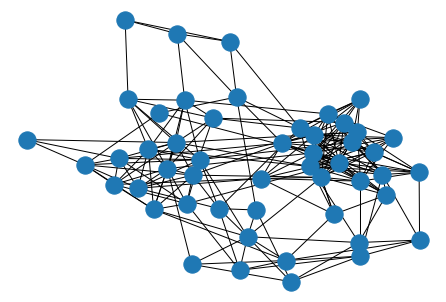

In [119]:
G = nx.read_edgelist('communities.edgelist')
nx.draw(G)

In [120]:
comms_iter = nx_comm.girvan_newman(G)
comms_iter

<generator object girvan_newman at 0x000002B79D12EC80>

In [121]:
s=next(comms_iter)

In [122]:
s

({'23', '32', '37', '49'},
 {'0',
  '1',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '2',
  '20',
  '21',
  '22',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '3',
  '30',
  '31',
  '33',
  '34',
  '35',
  '36',
  '38',
  '39',
  '4',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '5',
  '6',
  '7',
  '8',
  '9'})

In [132]:
colors=[0]*len(G.nodes)
k=0
for i in G.nodes:
    if str(i) in s[0]:
        colors[k]='red'
    else:
        colors[k]='green'
    k+=1

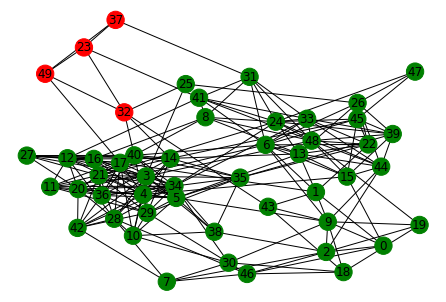

In [134]:
nx.draw(G,node_color=colors,with_labels=True)

2.2 Показать график динамики модулярности для шагов алгоритма алгоритма Гирвана-Ньюмена и визуализировать разбиение сети из 2.1 при наилучшей модулярности. Для визуализации требуется выбрать несколько цветов (в соответствии с количеством выделенных сообществ) и раскрасить узлы и связи в рамках одного сообщества этими цветами. Связи между узлами, состоящими в разных сообществах, отрисовать черным цветом. 

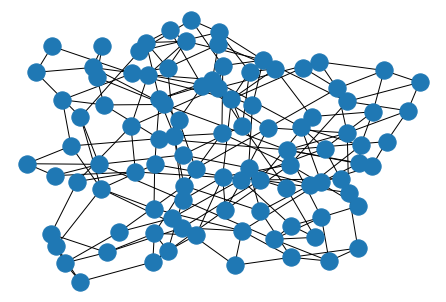

In [158]:
G=nx.read_edgelist('SW-100-5-0d3-trial3.edges')
nx.draw(G)

In [159]:
comms_iter = nx_comm.girvan_newman(G)
modul=[]
m=0
s=next(comms_iter)
s_good=list()
while nx_comm.modularity(G,s)>m:
    m=nx_comm.modularity(G,s)
    modul.append(nx_comm.modularity(G,s))
    s_good=s
    s=next(comms_iter)

In [160]:
s_good

({'0', '1', '2', '3', '4', '5', '6', '7'},
 {'79', '90', '91', '92', '93', '94', '95', '97', '99'},
 {'55', '56', '57', '58', '60', '98'},
 {'37', '38', '39'},
 {'30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '40',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '81'},
 {'26', '27', '28', '29', '86', '87', '88', '89'},
 {'70', '71', '72', '73', '74'},
 {'10',
  '11',
  '12',
  '59',
  '61',
  '62',
  '63',
  '64',
  '65',
  '66',
  '67',
  '68',
  '69',
  '8',
  '9',
  '96'},
 {'13', '14', '15', '16', '17'},
 {'18', '19', '20', '21', '22', '23', '24', '25'},
 {'75', '76', '77', '78', '80', '82', '83', '84', '85'},
 {'41', '42', '43', '44', '45', '46', '47'})

In [161]:
modul

[0.09948749999999987,
 0.27008749999999937,
 0.3317374999999993,
 0.3969874999999999,
 0.5175500000000021,
 0.5464250000000008,
 0.561625,
 0.5645499999999997,
 0.5665500000000003,
 0.5723625000000003,
 0.5725375000000004]

In [163]:
len(s_good)

12

In [164]:
G.nodes

NodeView(('0', '1', '2', '99', '98', '38', '7', '93', '3', '4', '32', '57', '28', '5', '79', '6', '70', '12', '8', '9', '10', '11', '66', '96', '13', '64', '14', '15', '27', '52', '16', '17', '34', '90', '31', '19', '77', '18', '20', '21', '85', '22', '42', '24', '23', '25', '84', '26', '29', '86', '30', '81', '89', '54', '33', '35', '36', '71', '40', '48', '37', '39', '91', '41', '53', '43', '44', '58', '45', '46', '63', '47', '94', '49', '82', '50', '51', '69', '59', '55', '56', '60', '61', '95', '62', '65', '67', '74', '68', '72', '73', '75', '92', '76', '78', '80', '97', '83', '87', '88'))

In [165]:
colors=[0]*len(G.nodes)
c=['red','orange','green','yellow','purple','pink','blue','grey','brown','white','cyan','silver']
k=0
for i in G.nodes:
    h=0
    for j in s_good:
        if i in j:
            break
        else:
            h+=1
    colors[k]=c[h]
    k+=1

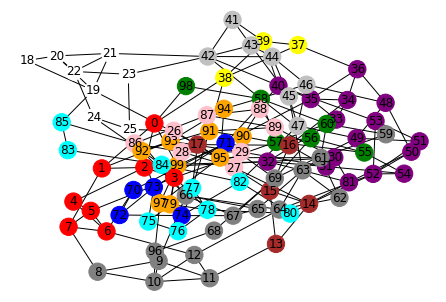

In [167]:
nx.draw(G,node_color=colors,with_labels=True)

2.3 Выполнить разбиение сети из 2.1 на сообщества с помощью Лувенского алгоритма. Визуализировать результат аналогично заданию 2.2.

In [144]:
!pip install python-louvain

  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9398 sha256=e14de8271093bdccbe059ded23e59b75c5ddb609aa1b61116e4fd38df488dd6e
  Stored in directory: c:\users\79165\appdata\local\pip\cache\wheels\af\40\91\ef3635f7d3ddbd889b5af9f1ac22b8d30c48d6f744cd74a6d1
Successfully built python-louvain


In [168]:
G = nx.read_edgelist('communities.edgelist')

In [169]:
from community import community_louvain
communities =community_louvain.best_partition(G)

In [170]:
communities

{'37': 0,
 '49': 0,
 '23': 0,
 '31': 1,
 '32': 0,
 '17': 2,
 '41': 1,
 '25': 0,
 '43': 3,
 '14': 2,
 '40': 2,
 '26': 1,
 '3': 2,
 '0': 3,
 '9': 3,
 '2': 3,
 '46': 3,
 '1': 3,
 '15': 1,
 '18': 3,
 '30': 3,
 '19': 3,
 '6': 1,
 '44': 1,
 '5': 2,
 '7': 3,
 '34': 2,
 '10': 2,
 '38': 2,
 '48': 1,
 '28': 2,
 '42': 2,
 '29': 2,
 '13': 1,
 '22': 1,
 '8': 1,
 '24': 1,
 '33': 1,
 '12': 2,
 '45': 1,
 '20': 2,
 '39': 1,
 '47': 1,
 '16': 2,
 '4': 2,
 '21': 2,
 '35': 2,
 '11': 2,
 '36': 2,
 '27': 2}

In [171]:
colors=[0]*len(G.nodes)
c1=[[],[],[],[]]
k=0
for i in communities:
    if communities[i]==0:
        colors[k]='red'
        c1[0].append(i)
    if communities[i]==1:
        colors[k]='green'
        c1[1].append(i)
    if communities[i]==2:
        colors[k]='yellow'
        c1[2].append(i)
    if communities[i]==3:
        colors[k]='orange'
        c1[3].append(i)
    k+=1

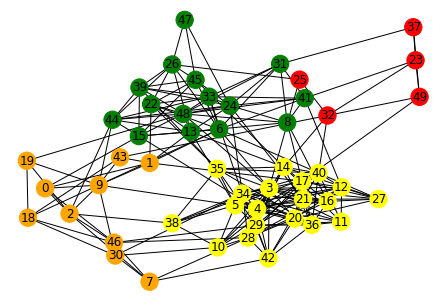

In [172]:
nx.draw(G,node_color=colors,with_labels=True)

In [173]:
nx_comm.modularity(G,c1)

0.43522805212619975

2.4 Визуализировать матрицу смежности сети из 2.1 при помощи `sns.heatmap`. Получить и визуализировать матрицу смежности для сети, в которой узлы перенумерованы в порядке возрастания номера сообщества, которому они принадлежат (т.е. номера $0...C_1-1$ даются $C_1$ узлам, принадлежащим первому сообществу; номера $C_1...C_2-1$ даются $C_2$ узлам, принадлежащим второму сообществу и т.д.)

2.5 $(*)$ Создать собственную реализацию алгоритма Гирвана-Ньюмена. Для нее выполнить визуализацию результата алгоритма.

## "Дискретный" алгоритм распространения меток

3.1. Визуализировать разбиение сети карате клуба на сообщества с помощью реализации алгоритма распространения меток из `networkx`.

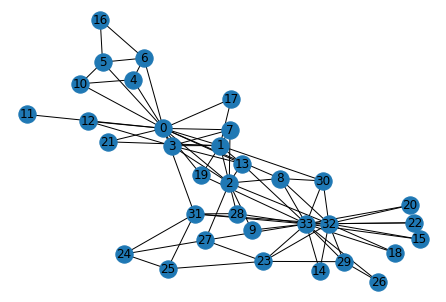

In [246]:
G = nx.karate_club_graph()
# commutities = []
nx.draw(G, with_labels=True)

In [177]:
from networkx.algorithms import community

In [183]:
s=list(community.asyn_lpa_communities(G))

In [186]:
len(s),s

(5,
 [{0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21},
  {4, 10},
  {5, 6, 16},
  {8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33},
  {24, 25, 28, 31}])

In [187]:
colors=[0]*len(G.nodes)
k=0
for i in G.nodes:
    if int(i) in s[0]:
        colors[k]='red'
    if int(i) in s[1]:
        colors[k]='green'
    if int(i) in s[2]:
        colors[k]='blue'
    if int(i) in s[3]:
        colors[k]='yellow'
    if int(i) in s[4]:
        colors[k]='grey'
    k+=1

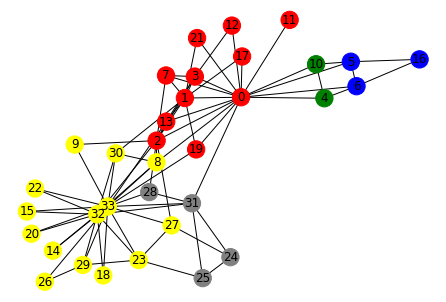

In [188]:
nx.draw(G,node_color=colors,with_labels=True)

3.2 Реализовать алгоритм распространения меток. Решить с его помощью задачу 3.1. Визуализировать пошаговую динамику распространения меток и итоговое разбиение сети.

In [254]:
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import random
from collections import Counter

In [255]:
def _label_init(G):    
    for i, n in enumerate(G.nodes):
        G.nodes[n]['label'] = i #Каждому узлу присваивается собственная метка сообщества

In [256]:
def _update_label(node, label, G):
#На следующем шаге узлу присваивается метка, наиболее распространенная среди его соседей
#(если максимум многозначен - выбирается случайным образом из макисмальных):
    freqs = Counter(G.nodes[neighbor]['label'] for neighbor in G.neighbors(node)) #подсчет количества уникальных меток среди соседей
    max_freq = max(freqs.values())#максимальная значение количества метки из всех возможных
    freqs_max = {n: f for n, f in freqs.items() if f == max_freq}#оставляем метку с наибольшим количесвтом повторений
    if label not in freqs_max.keys():
        G.nodes[node]['label'] = random.choice(list(freqs_max.keys()))
        return True 
    else: 
        return False 

In [257]:
def LPA(G):
    _label_init(G)
    changed = True
    while changed:       
        for node, label in G.nodes(data='label'):
            ch = _update_label(node, label, G) 
            changed = ch  

In [258]:
color = {i: "#"+''.join([random.choice('0123456789ABCDEFFFFFFF') for j in range(6)])
             for i in range(len(G.nodes()))}

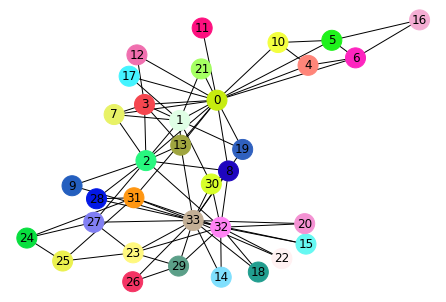

In [259]:
_label_init(G)
node_color = [color[l] for n, l in G.nodes(data='label')]
plt.figure()
nx.draw(G, with_labels=True, node_size=400, node_color= node_color)

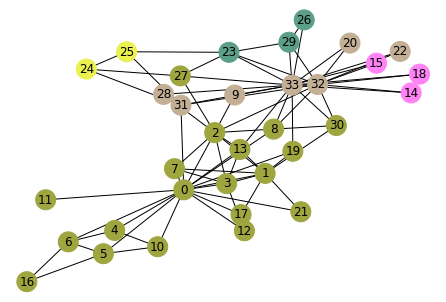

In [260]:
LPA(G)
node_color = [color[l] for n, l in G.nodes(data='label')]
plt.figure()
nx.draw(G, with_labels=True, node_size=400, node_color= node_color)

In [261]:
G.nodes(data='label')

NodeDataView({0: 13, 1: 13, 2: 13, 3: 13, 4: 13, 5: 13, 6: 13, 7: 13, 8: 13, 9: 33, 10: 13, 11: 13, 12: 13, 13: 13, 14: 32, 15: 32, 16: 13, 17: 13, 18: 32, 19: 13, 20: 33, 21: 13, 22: 33, 23: 29, 24: 25, 25: 25, 26: 29, 27: 13, 28: 33, 29: 29, 30: 13, 31: 33, 32: 33, 33: 33}, data='label')

In [266]:
a=list(G.nodes[neighbor]['label'] for neighbor in G.neighbors(0))

In [270]:
s,h=np.unique(a,return_counts=True)

In [271]:
dict(zip(s,h))

{13: 15, 33: 1}

3.3 $(*)$ Выполнить разбиение сети на сообщества на основании множественного повторения дискретного label propagation по следующему принципу: если узлы часто оказываются в одном сообществе (при различных запусках алгоритма), то считать, что действительно находятся в одном сообществе.